# Project: Customer Segmentation

## Business Problem



We are going to make use of unsupervised learning techniques to try to analyse a dataset containing data on various customers' annual spending amounts for diverse product categories purchased. We will try to describe the variation in the different types of customers that the wholesale distributor (which has collected the data for) interacts with. Doing so will help the distributor gain  insights into how to best introduce a new delivery service to best meet the needs of the customers it serves.

![Whole Sale](http://i.imgur.com/2Sx4ALp.jpg)

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). We have excluded the `'Channel'` and `'Region'` features to focus the product categories recorded for customers.

## Import Python libraries

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualisations code visuals.py
import visuals as vs

# Pretty display for notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Perform Exploratory Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [6]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### The Data Set Feature/Attribute Information:

*	FRESH: annual spending (m.u.) on fresh products (Continuous); 
*	MILK: annual spending (m.u.) on milk products (Continuous); 
*	GROCERY: annual spending (m.u.)on grocery products (Continuous); 
*	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
*	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
*	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

### Product Categories Exploration
Observe a statistical description of the dataset, check the relevance of each feature, and select a few sample data points from the dataset which we can track throughout the project.

In [7]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The dataset is composed of six important product categories that the distributor's customers have purchased: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**.

#### Product distribution

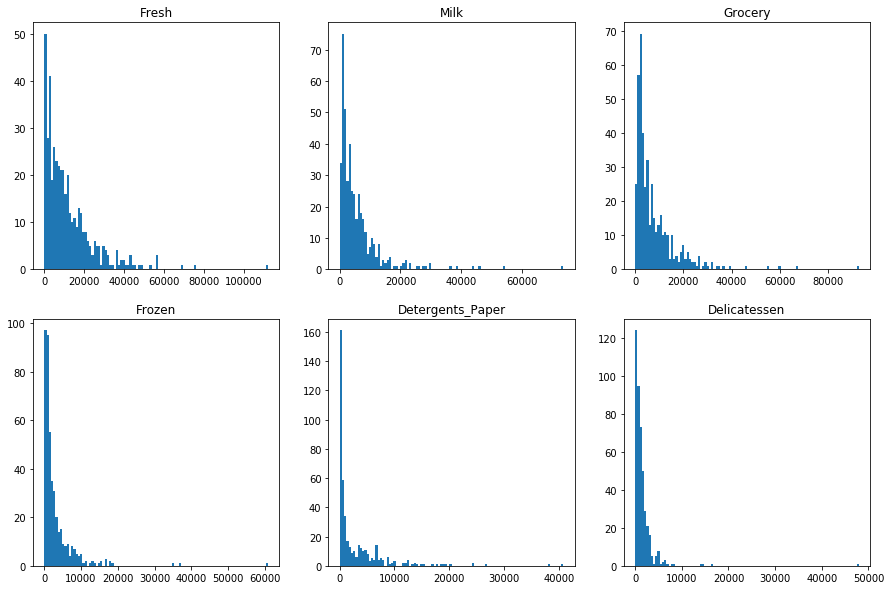

In [8]:
#Display the distribution accross all features
features = data.columns.values

import seaborn as sns
fig = plt.figure(figsize=(15,10))
for i in range(len(features)):
    ax = fig.add_subplot(2,3,i+1)
    ax.set_title(features[i])
    ax.hist(data[features[i]], bins = 100)
plt.show()    

### Selecting Customer/Product Samples
We will select a few sample data points and explore them in more detail. let's get 3 indices to track the sample customers.

In [9]:
# Select three indices of customers to track
indices = [33, 222, 107]

# Create a DataFrame of these customer samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,29729,4786,7326,6130,361,1083
1,5041,1115,2856,7496,256,375
2,8797,10646,14886,2471,8969,1438


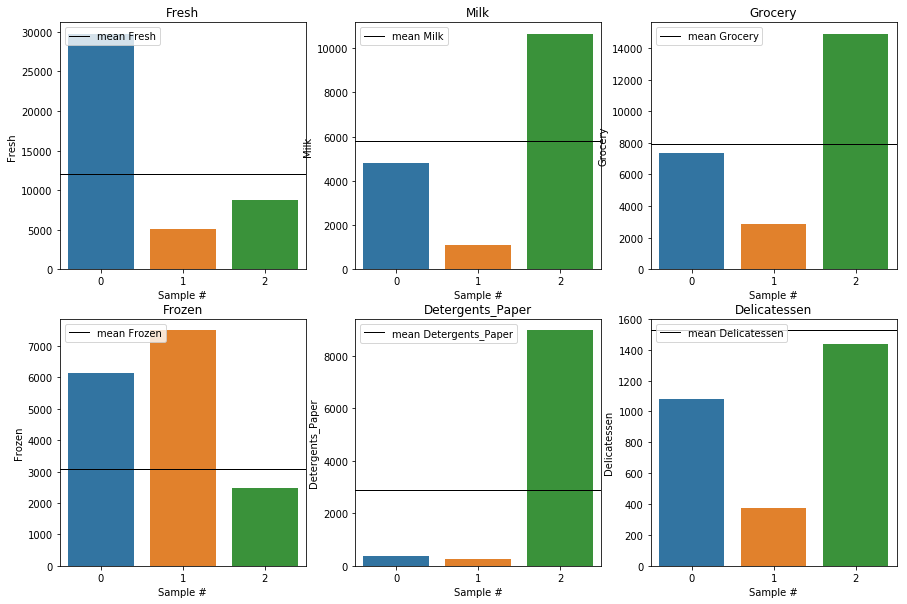

In [10]:
#Display annual spending for the 3 customer samples chosen
import seaborn as sns

fig = plt.figure(figsize=(15,10))
for i in range(len(features)):
    mean_f = data[features[i]].mean()
    ax = fig.add_subplot(2,3,i+1)    
    ax.set_title(features[i])
    ax.set_xlabel("Sample #")
    sns.barplot(x=samples.index.values, y = samples[features[i]] , data=samples)
    plt.plot([-1, 3], [mean_f, mean_f], 'k-', lw=1, label = "mean " + features[i] )
    ax.legend(loc='upper left')


plt.show()

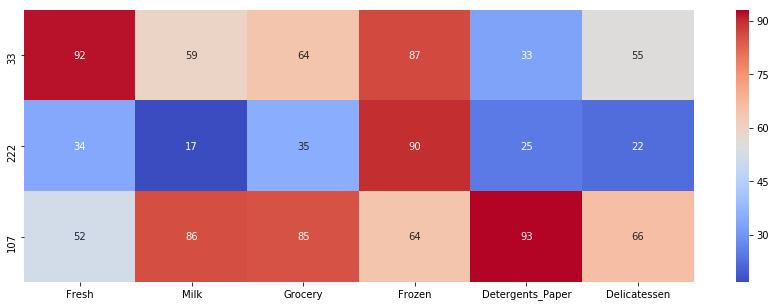

In [11]:
# Let's look at the percentile heatmap for these t3 sample points
import seaborn as sns

fig = plt.figure(figsize=(15,5))
percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True, cmap='coolwarm')

We observe that sample 107 is above the 80th percentile in three product categories: Milk, Grocery, Detergent_Paper - likely a retail customer
We also observe that sample 33 is above the 85th percentile in two product categories: Fresh and Frozen - likely a hotel/Restaurent/Market customer

Each customer is an establishement likely defined by a specific purchase profile. We can maybe assume that: 
* markets: purchase a lot of fresh produce but lilkely much less Detergents_paper, Milk, Grocery, Frozen products
* cafes/restaurents: purchase more Fresh and Milk, some Detergents_paper products but maybe less Frozen products and Grocery products
* delis:  purchase a lot of Delicatessen and maybe Fresh products but much less Frozen products, Detergents_paper and maybe groceries
* wholesale retailers: purchase more of Frozen, Detergents_paper and Grocery products and possibly less Milk and Fresh products
* hotels: purchase more of Detergents_paper, Fresh products and possibly less Groceries and Milk poducts

If these assumptions approximately hold true then we could validate whether the following statements about the samples/customers chosen are true:
* sample/customer 0: This establishement could possibly be a hotel as it purchased a large amount of Fresh and Frozen products (much higher than the average for these product categories), approximately spent the same as the overall population for Milk and Groceries (close to the mean for these products), less than average for Delicatessen products and very little Detergents_paper. 
* sample/customer 1: this establishement could possibly be a fast food restaurent as the amount of frozen product purchased is much higher than the average while the amount spent on all other product categories is below average. 
* sample/customer 2: this establishement could possibly be a retail/convenient store as it spent much more than average on Groceries, Milk and Detergents_paper products while it spent a little below average for all other product categories.


### Investigate Feature Relevance
Understand if/which of the six product categories is the most relevant for understanding customer purchasing: i.e determining whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products. <br/>

We now use a supervised regression learner on a subset of the data with one feature removed - let's chose Frozen - and then score how well that model can predict the removed feature.

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, drop the 'Frozen' feature
new_data = data.drop('Frozen', axis =1)
X = new_data
y = data['Frozen']

scores = []

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 111)

# Average the R^2-scores over many iterations (100), without setting any of the random states
for i in range(0,100):    

    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    scores.append(regressor.score(X_test, y_test))

# final results
score_mean = np.mean(scores)
print("Score - Coefficient of determination R^2 : {}".format(score_mean.mean()))

Score - Coefficient of determination R^2 : 0.0453175762935


R^2 = ~0.05. This means that a very large proportion of the variance of the Frozen will be very difficult to  predicted using other features. <br/>
The Frozen feature will be necessary for identifying customers' spending habits <br/>

### Visualize Feature Distributions
Construct a scatter matrix of each of the six product Categories present in the data - the scatter plot matrix will help show any correlation between each features. This will help us identify which product catgories are more relevant to identifying customer/establishement types.

C:\Users\Chris Cochet\Anaconda3\envs\Udacity_MLND\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


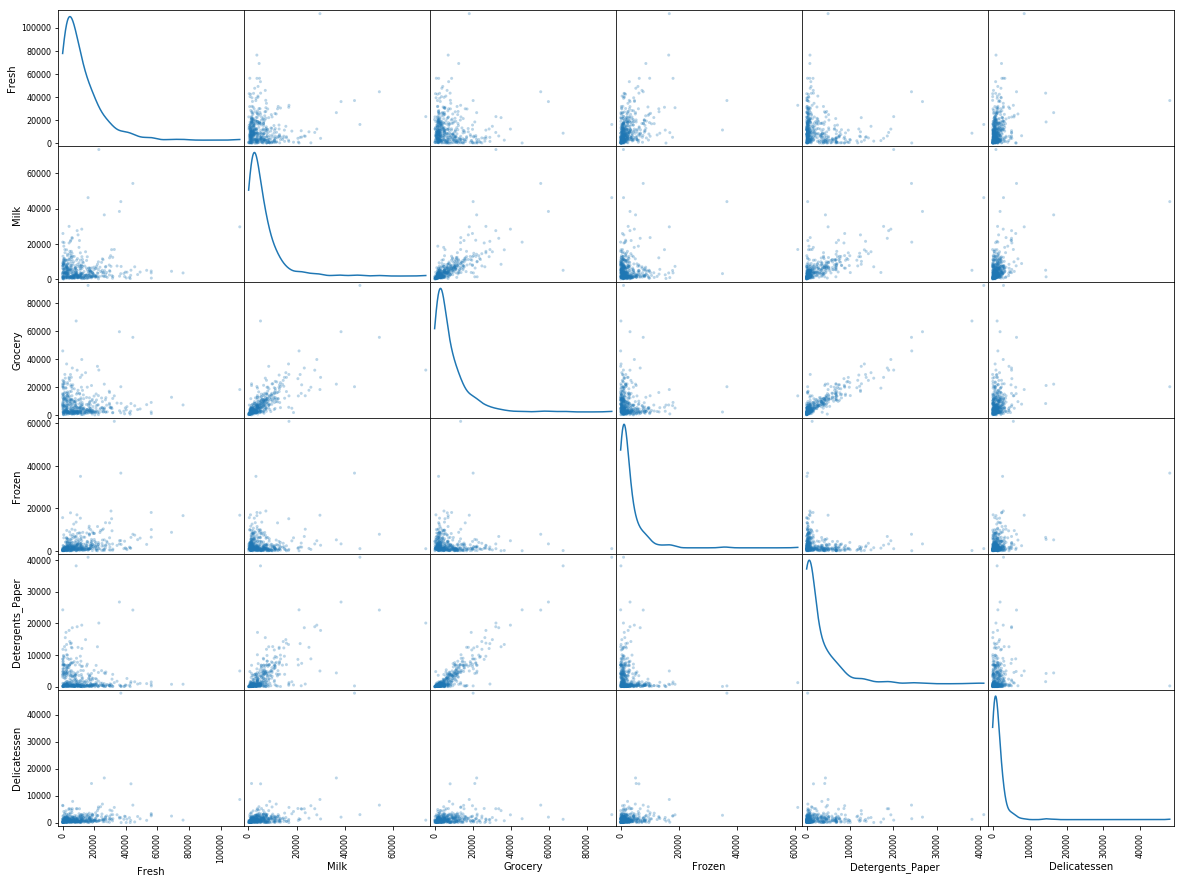

In [15]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (20,15), diagonal = 'kde');

#### Check for purchase outliers

Text(0.5,0,u'Product Categories')

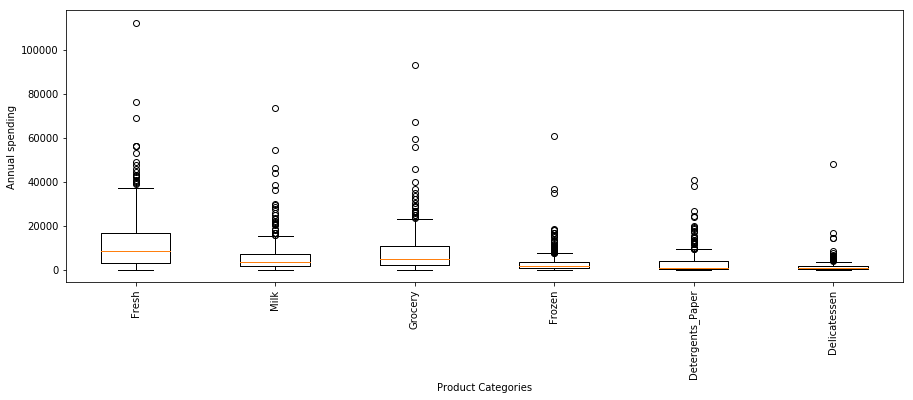

In [18]:
# Display IQR and outliers
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
features = data.columns.values
#print(features)
ax.boxplot(data[features].values)
ax.set_xticklabels(features, rotation = 90)
ax.set_ylabel("Annual spending")
ax.set_xlabel("Product Categories")
#ax.set_ylim(-5000,40000)

#### Check product correlations

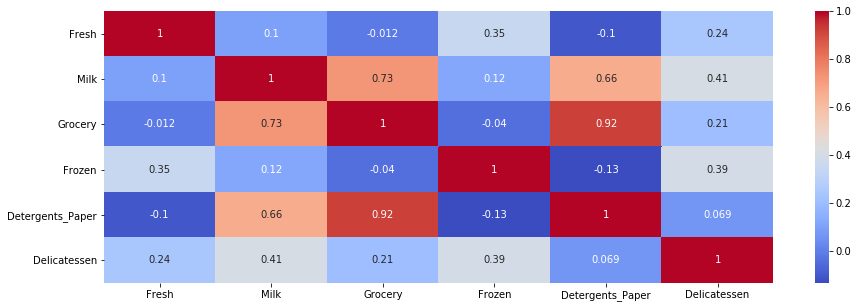

In [19]:
plt.subplots(figsize=(15,5))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

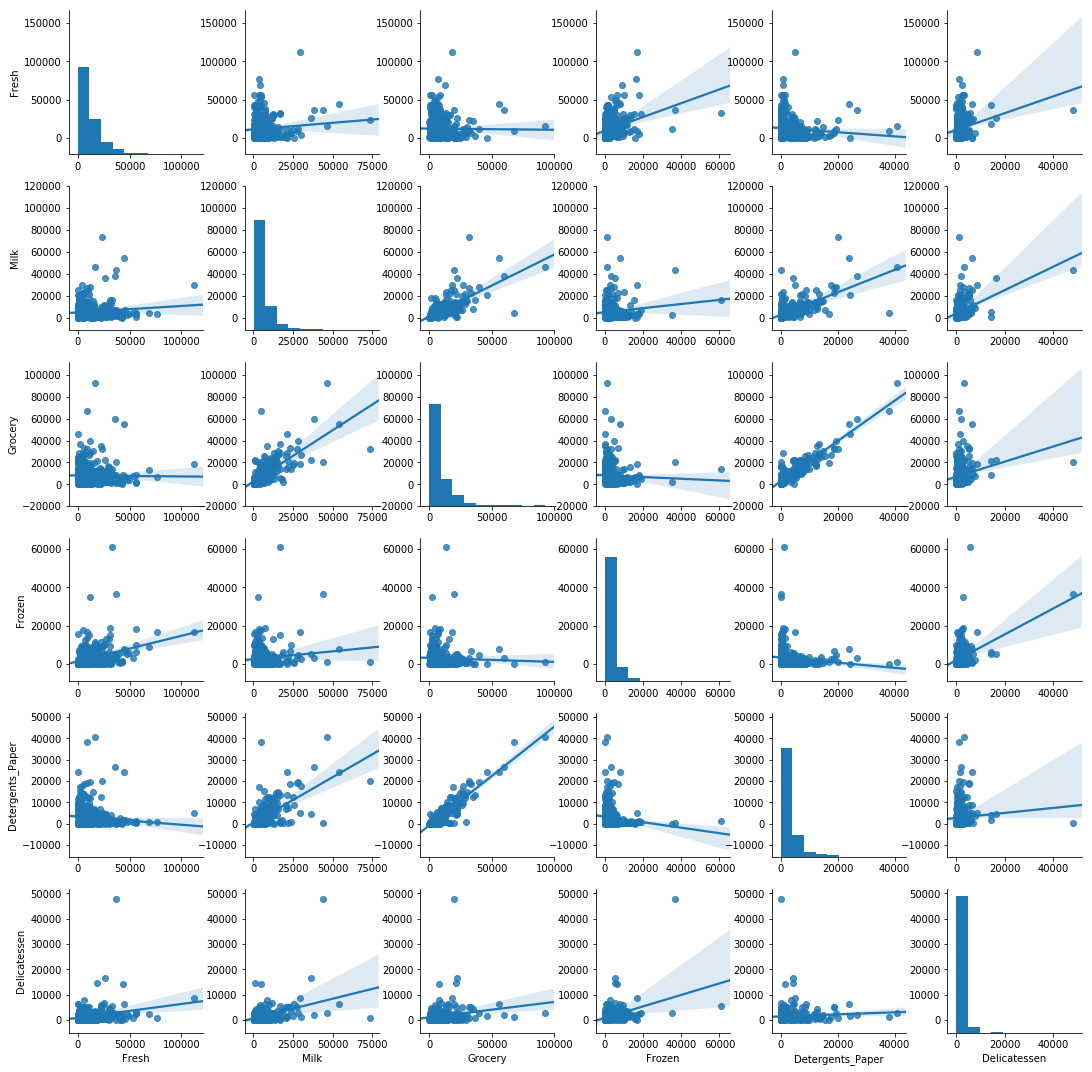

In [20]:
sns.pairplot(data, kind="reg")

The disributions of the data set features don't seem normally distributed, they are skewed to the right and have long tails due to numerous outliers as shown in the figure above (the outliers for each product category are identified by a "o" marker outside the whiskers of the boxplot). The box plot and median (in orange) also demonstrates how most of the data is concentrated towards 0.<br/>

There are pairs of features that exhibit a degree of correlation. In addition to the correlation matrix values above, these can be spotted as they display a concentrated cluster roughly in the shape of a line such as:
- Detergents_paper and Groceries products
- Detergents_paper and Milk products products
- Grocery and Milk products

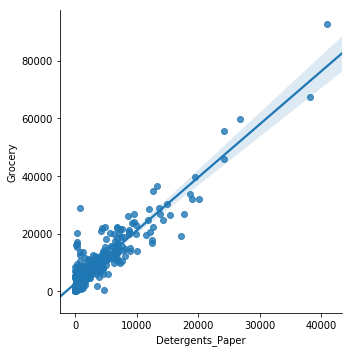

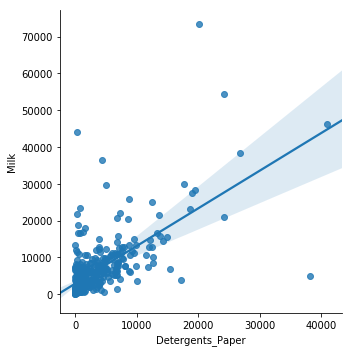

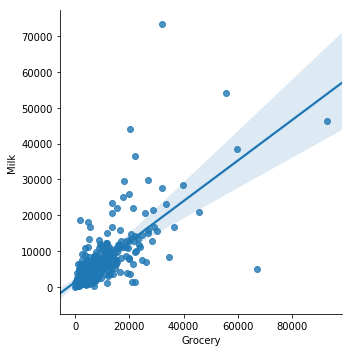

In [21]:
# pairs of features which exhibiting some correlation
sns.lmplot(x='Detergents_Paper',y='Grocery', data=data)
sns.lmplot(x='Detergents_Paper',y='Milk',data=data)
sns.lmplot(x='Grocery',y='Milk',data=data)

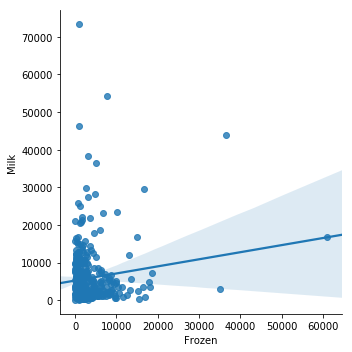

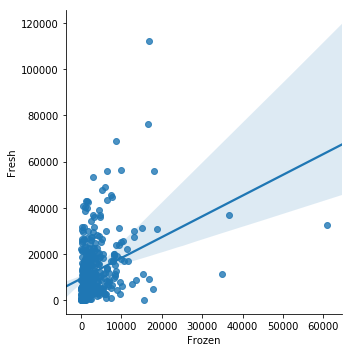

In [22]:
sns.lmplot(x='Frozen',y='Milk',data=data)
sns.lmplot(x='Frozen',y='Fresh',data=data)

#### Display the KDEs of the products

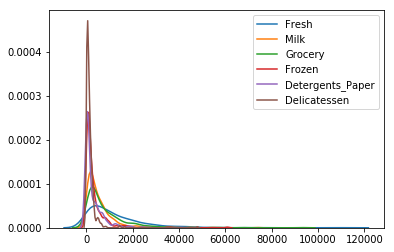

In [61]:
for i in features:
    sns.kdeplot(data[i])

## Data Preprocessing

#### Feature Scaling
The data is not normally distributed, let's try to improve this by using a log function to scale the data set

C:\Users\Chris Cochet\Anaconda3\envs\Udacity_MLND\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


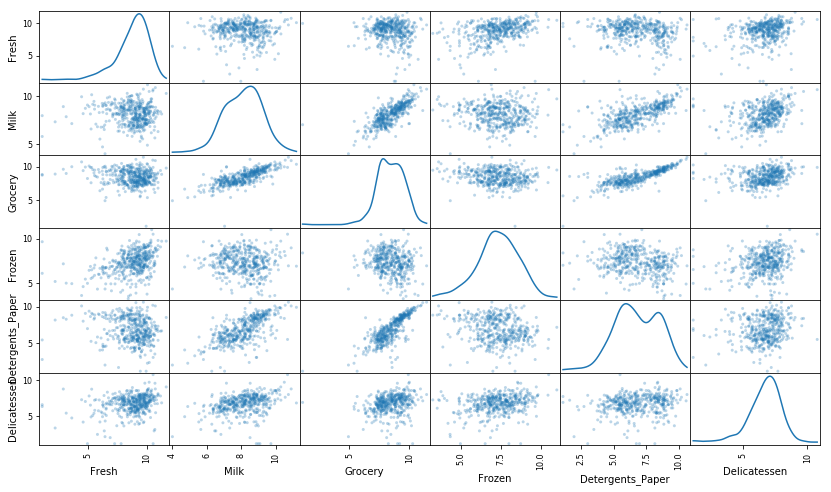

In [23]:
# Scale the data using log
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

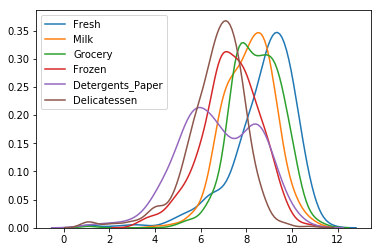

In [24]:
# View the new data distribution
for i in features:
    sns.kdeplot(log_data[i])

After applying a log  to the data, the distribution of each feature appear much more normal.

We observe that the correlations are still present after the log transform

In [25]:
# Display the log-transformed three sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.299878,8.47345,8.899185,8.720950,5.888878,6.987490
1,8.525360,7.01661,7.957177,8.922125,5.545177,5.926926
2,9.082166,9.27294,9.608176,7.812378,9.101529,7.271009


### Outlier Detection
Use the interquartile range (IQR) to detect outliers (+/- 1.5 IQR rule) 

Text(0.5,1,u'Log Data - with outliers')

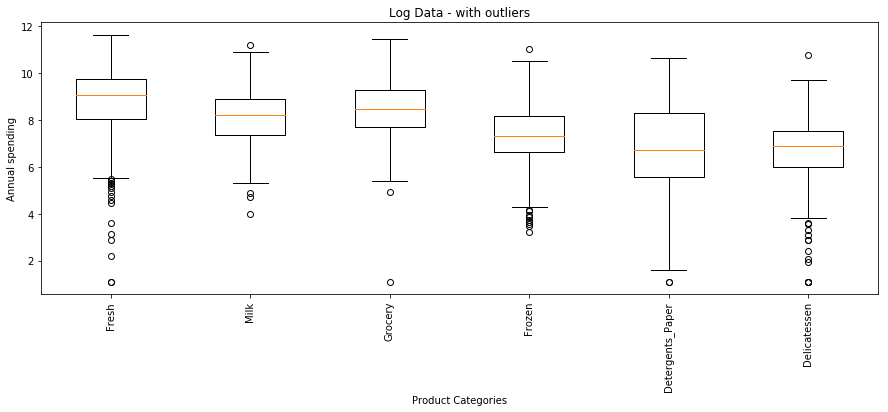

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
features = log_data.columns.values
#print(features)
ax.boxplot(log_data[features].values)
ax.set_xticklabels(features, rotation = 90)
ax.set_ylabel("Annual spending")
ax.set_xlabel("Product Categories")
ax.set_title("Log Data - with outliers")

#### Remove outliers which are present in more than one product category 

In [27]:
outliers = pd.DataFrame()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    curr_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]    
    print("{} Number of data points considered outliers for the feature '{}' with step {:.2f}, lower bound {:.2f}, upper bound {:.2f}".format(curr_outliers.shape[0], feature, step, Q1 - step, Q3 + step ))
    display(curr_outliers[feature])
    outliers = outliers.append(curr_outliers)

# ensure our indices are not removed 
for i in indices:
    if i in outliers:
        outliers = outliers.drop(i)

duplicates = outliers.groupby(level=0).filter(lambda x: len(x) > 1)

# Remove only outliers which are present in more than one product category
good_data = log_data.drop(log_data.index[duplicates.index]).reset_index(drop = True)

16 Number of data points considered outliers for the feature 'Fresh' with step 2.53, lower bound 5.51, upper bound 12.27


65     4.442651
66     2.197225
81     5.389072
95     1.098612
96     3.135494
128    4.941642
171    5.298317
193    5.192957
218    2.890372
304    5.081404
305    5.493061
338    1.098612
353    4.762174
355    5.247024
357    3.610918
412    4.574711
Name: Fresh, dtype: float64

4 Number of data points considered outliers for the feature 'Milk' with step 2.32, lower bound 5.02, upper bound 11.20


86     11.205013
98      4.718499
154     4.007333
356     4.897840
Name: Milk, dtype: float64

2 Number of data points considered outliers for the feature 'Grocery' with step 2.40, lower bound 5.28, upper bound 11.67


75     1.098612
154    4.919981
Name: Grocery, dtype: float64

10 Number of data points considered outliers for the feature 'Frozen' with step 2.35, lower bound 4.26, upper bound 10.53


38      3.496508
57      3.637586
65      3.583519
145     3.737670
175     3.951244
264     4.110874
325    11.016479
420     3.218876
429     3.850148
439     4.174387
Name: Frozen, dtype: float64

2 Number of data points considered outliers for the feature 'Detergents_Paper' with step 4.09, lower bound 1.46, upper bound 12.36


75     1.098612
161    1.098612
Name: Detergents_Paper, dtype: float64

14 Number of data points considered outliers for the feature 'Delicatessen' with step 2.24, lower bound 3.77, upper bound 9.75


66      3.295837
109     1.098612
128     1.098612
137     3.583519
142     1.098612
154     2.079442
183    10.777768
184     2.397895
187     1.098612
203     2.890372
233     1.945910
285     2.890372
289     3.091042
343     3.610918
Name: Delicatessen, dtype: float64

In [28]:
good_data.shape

(435, 6)

#### Visualise the data set after outliers have been removed

Text(0.5,1,u'Good Data - without outliers')

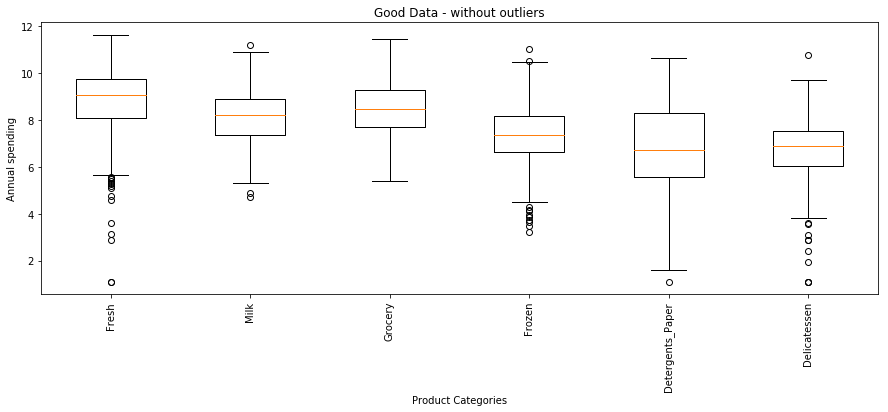

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
features = good_data.columns.values
#print(features)
ax.boxplot(good_data[features].values)
ax.set_xticklabels(features, rotation = 90)
ax.set_ylabel("Annual spending")
ax.set_xlabel("Product Categories")
ax.set_title("Good Data - without outliers")

We have found 5 instances of customers who have more than one product category purchase that is an outlier. These are hown below:

In [31]:
duplicates = duplicates.drop_duplicates()
print(duplicates.shape)
display(duplicates)

(5, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


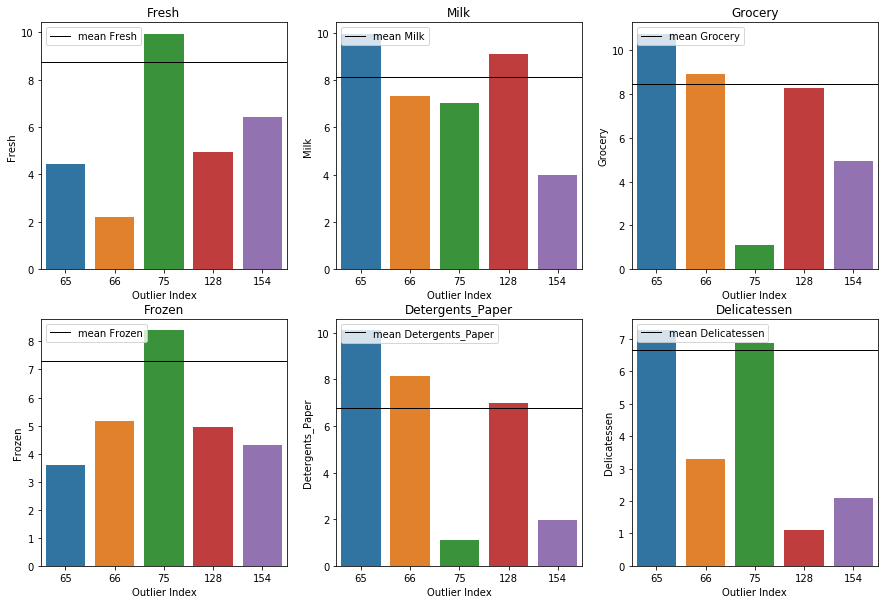

In [32]:
fig = plt.figure(figsize=(15,10))
for i in range(len(features)):
    mean_f = log_data[features[i]].mean()
    ax = fig.add_subplot(2,3,i+1)    
    ax.set_title(features[i])
    ax.set_xlabel("Outlier Index")
    sns.barplot(x=duplicates.index.values, y = duplicates[features[i]] , data=duplicates)
    plt.plot([-1, 5], [mean_f, mean_f], 'k-', lw=1, label = "mean " + features[i] )
    ax.legend(loc='upper left')

plt.show()

## Feature Transformation
Use principal component analysis (PCA) to reduce dimensions and find which compound combinations of features best describe customers.

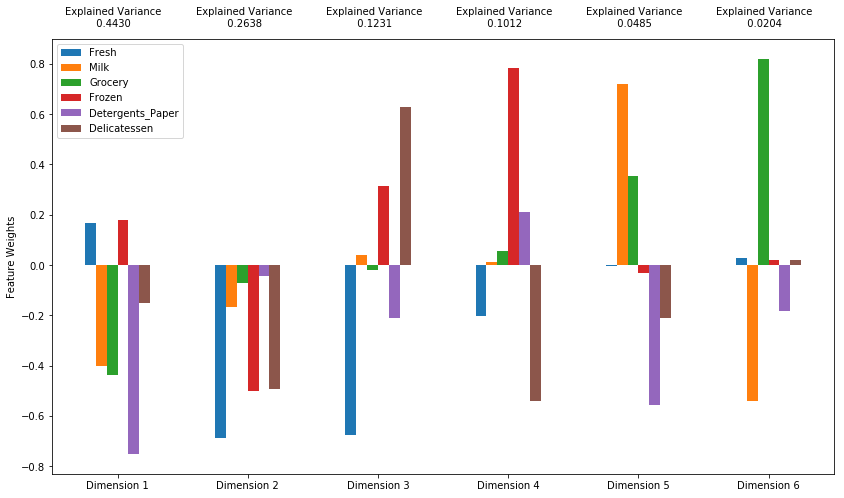

In [34]:
from  sklearn.decomposition import PCA 
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1]).fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [76]:
pca.explained_variance_ratio_

array([0.44302505, 0.26379218, 0.1230638 , 0.10120908, 0.04850196,
       0.02040793])

We observe that PC 1 & 2 explain approximately 0.45 + 0.26 = ~0.7 of the data's variance <br/>
Looking at the first and second component explain by themselves a large propotion of the data's variance. In particular, if we look at the magnitude of the weights we can identify two distinct set of features on these first two components which  can likely be used to separate out two customer segments: one defined by Detergent_paper, Grocery, and Milk (PC 1) and another defined by Fresh, Milk, Frozen (PC 2). This observation seems is in line with our initial thoughts: retail/markets sgement on one side and Hotel/Delis/Restaurents/Caffes on the other.

In [35]:
old = 0
pc_vals_cuml = []
for i in pca.explained_variance_ratio_:
    pc_vals_cuml.append(i+old)
    old = i+old

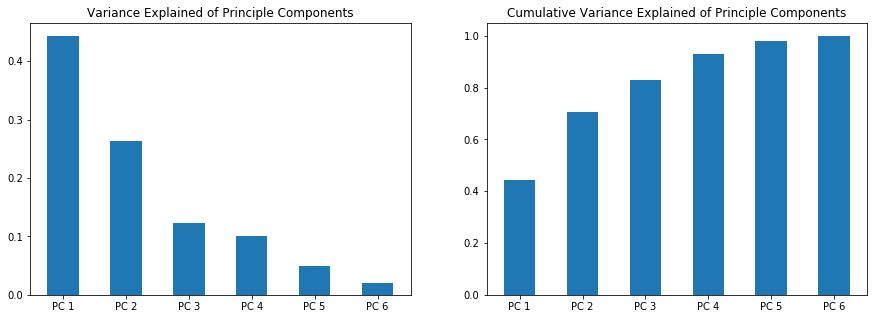

In [36]:
#Show PC proportion of variance exaplained (incl. cumulative) 
labels_ = ['PC 1','PC 2','PC 3','PC 4','PC 5','PC 6' ]
pc_vals = [pca.explained_variance_ratio_]

pd_pca = pd.DataFrame.from_records(pc_vals, columns=labels_)
pd_pca_cumul  = pd.DataFrame.from_records([pc_vals_cuml], columns=labels_)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
bar_heights = pd_pca.iloc[0].values
bar_positions = np.arange(6)
ax1.bar(height = bar_heights, left = bar_positions, width = 0.5)
ax1.set_xticks(np.arange(len(labels_)))
ax1.set_xticklabels(labels_)
ax1.set_title("Variance Explained of Principle Components")

bar_heights = pd_pca_cumul.iloc[0].values
ax2.bar(height = bar_heights, left = bar_positions, width = 0.5)
ax2.set_xticks(np.arange(len(labels_)))
ax2.set_xticklabels(labels_)
ax2.set_title("Cumulative Variance Explained of Principle Components")

plt.show()

#### Sample Observation
PCA transformation applied to our three sample observations.

In [80]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8147,-1.9456,-0.2164,0.4626,0.8007,0.4189
1,1.9682,0.0198,0.4150,1.4152,-0.1703,0.4271
2,-2.6392,-1.1158,-0.1614,0.5671,-0.1916,-0.0657


### Reduce Dimensionality
Now use PCA to reduce the dimensinality of our customer data set

In [37]:
# Apply PCA by fitting the good data with only two dimensions
n_component = 2
pca = PCA(n_components=n_component).fit(good_data) 

# Transform the good data using the PCA fit above
reduced_data =  pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [38]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


In [39]:
reduced_data.shape

(435, 2)

#### Visualising the PCs
The biplot below will show the projection of the original features along the components.

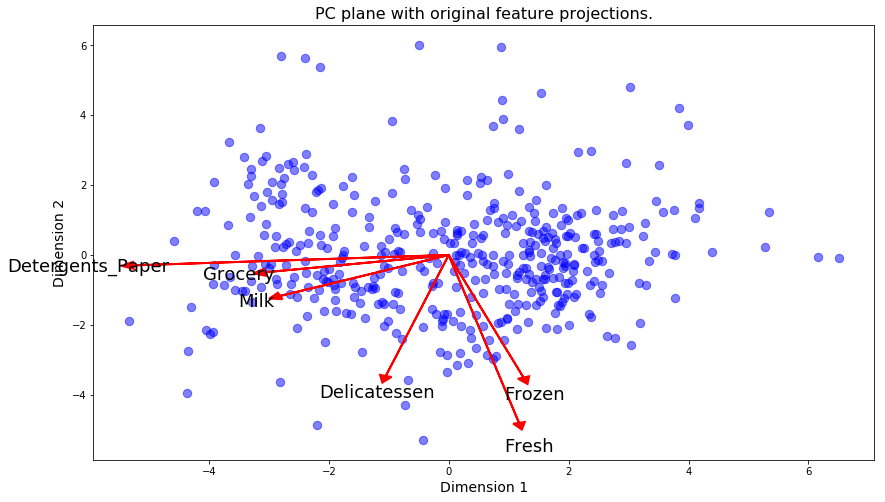

In [40]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

The Milk, grocery and Detergent_paper (and to lesser extent Delicatessen) features negatively contribute to the first component while the Delicatessen, Fresh and Frozen features contribute to the second component (with Detergent_paper feature having the largest magnitude/contribution). Both Fresh, Frozen and Detergent_paper products have a negative correlation with the second component. <br/>

## Use Clustering to Find Customer Segments 

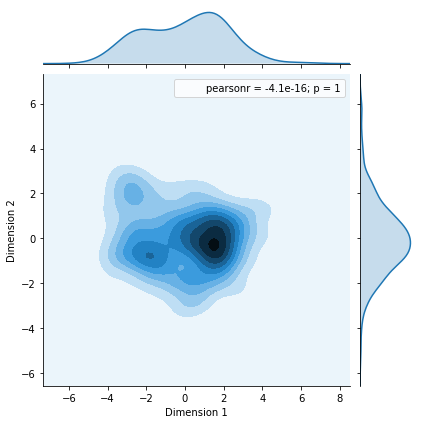

In [86]:
#sns.jointplot(x='Dimension 1',y='Dimension 2',data=reduced_data,kind='scatter')
sns.jointplot(x='Dimension 1',y='Dimension 2',data=reduced_data,kind='kdeplot')

By looking at the graph below, we can clearly identify at least 2 clusters and possibly 3 (with the top left possibly another cluster). There seems to be some overlap between the two clusters and we will use a soft cluster approach: Gaussian Mixter Model. 

### Implementation: Creating Clusters
Use GMM to identify customer segments and evaluate model with the silhouette coefficient <br/>
Use the elbow method to identify the best n = number of clusters.

In [42]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import  silhouette_score
def clustering_errors(k, data):
    gmm = GaussianMixture(n_components=k, init_params = 'kmeans').fit(data)
    predictions = gmm.predict(data)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

In [43]:
X = reduced_data
max_clusters = 30
possible_k_values = range(2, max_clusters)

# Calculate error values for all k values we're interested in
errors_per_k = [clustering_errors(k, X) for k in possible_k_values]

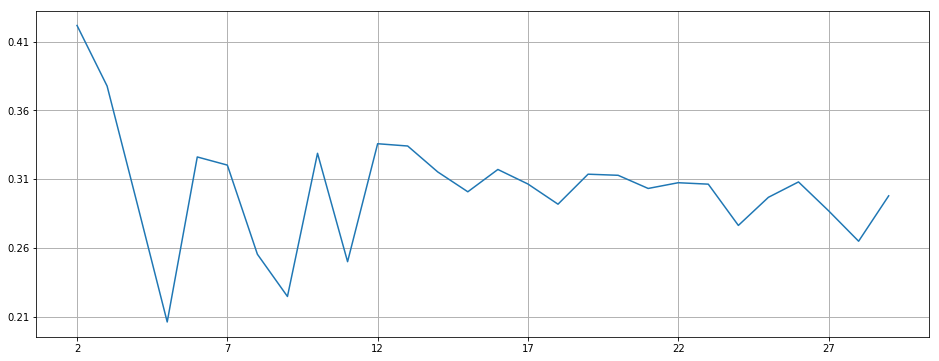

In [89]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

With GMM, the optimal number of clusters is 2

#### Use n=2 clusters to segment the customer data

In [45]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components= 2, init_params = 'kmeans', covariance_type='full').fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(X)

#  Find the cluster centers
# measure each cluster's corresponding density for each training point, and choose the poing with the maximal density
# ref: https://stackoverflow.com/questions/47412749/how-can-i-get-a-representative-point-of-a-gmm-cluster
import scipy.stats
centers = np.empty(shape=(clusterer.n_components, X.shape[1]))
for i in range(clusterer.n_components):
    density = scipy.stats.multivariate_normal(cov=clusterer.covariances_[i], mean=clusterer.means_[i]).logpdf(X)
    i_max = np.argmax(density)
    centers[i, :] = X.iloc[i_max]

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score_data = silhouette_score(X, preds)
score_samples = silhouette_score(pca_samples, sample_preds)

print("Reduced data silouhette score {:.3f}".format(score_data))
print("Smaple data silouhette score {:.3f}".format(score_samples))

Reduced data silouhette score 0.422
Smaple data silouhette score 0.293


#### Our two customer cluster centers

In [46]:
centers

array([[-2.12763306,  0.27453378],
       [ 1.35374279, -0.03788601]])

### Visualise Clusters, Customer Sgements and Data Samples

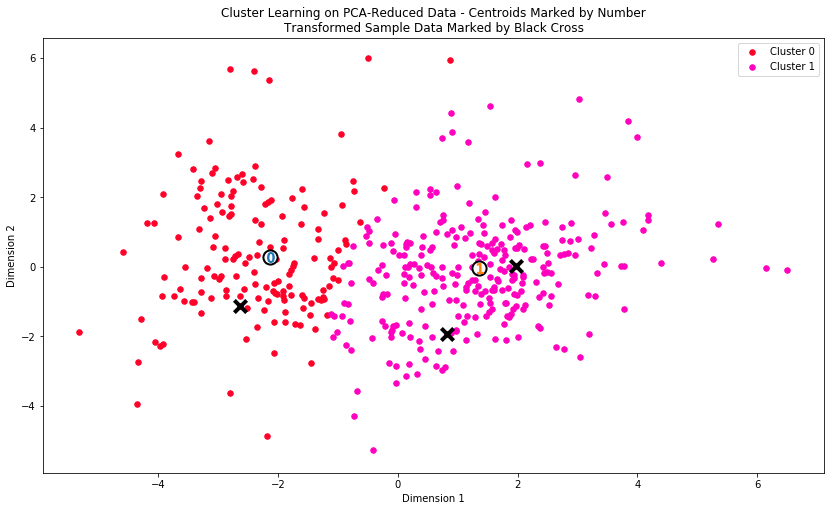

In [93]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

All feature values of segment 0 are clearly below their respective feature means in the data set. On ther other hand segment 1 is characterise by Grocery, Milk and Delicatessen spending which are above these feature means.   

- Looking at Segment 1 and and the PC 1, we can see that this center and cluster is representative of customers/establishment characterised with higher spending on Milk, Grocery, Detergents_paper and to a lesser extent Delicatessen products. 
- Relative to segment 1, segment 0 on the other hand is characterised on the PC 2 axis by spending on Frozen and Fresh products <br/>

This possibly suggests that Segment 0 is the center of a cluster of establishments represented by hotels, restaurents, Caffes and Delis while Segment 1 is the center of a cluster of establishments represented by whole sale retailers and maybe markets.

### Conclusion:

Using A/B testing, the distributor can now test with a small subset of customers from both of the clusters we've identified and compare the two versions of a new delivery service and determine which of the two service registers the most customer satisfaction in both customer subsets. 